In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# pip install bayesian-optimization


In [62]:
train=pd.read_csv(r"/content/train_Bigmart.csv")

In [63]:
tr=train.copy(deep=True)

In [64]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [65]:
train.shape

(8523, 12)

In [66]:
train.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [68]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [71]:
# train.corr()

ValueError: could not convert string to float: 'FDA15'

In [73]:
# corr_matrix = train.corr()
# plt.figure(figsize=(6, 4))
# sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
# plt.title('Correlation Matrix Heatmap')
# plt.show()

ValueError: could not convert string to float: 'FDA15'

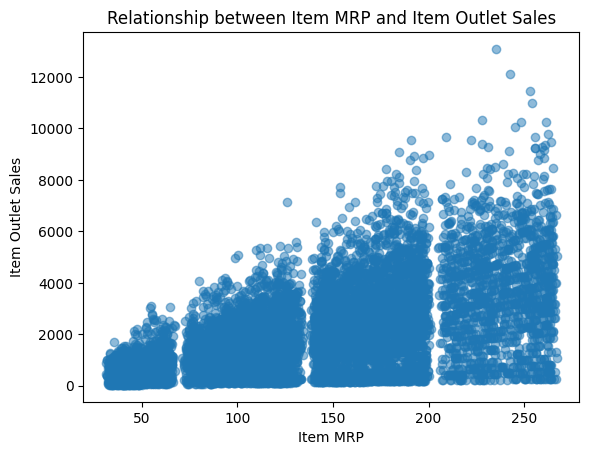

In [74]:
x = train['Item_MRP']
y = train['Item_Outlet_Sales']

# Scatter plot
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item MRP and Item Outlet Sales')
plt.show()


In [ ]:
# sns.pairplot(train)
# plt.show()

In [75]:
# check unique values in dataset
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [77]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [78]:
# Missing value percentage
train['Outlet_Size'].isnull().mean(axis=0) * 100

28.27642848762173

In [79]:
# Missing value imputation
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode().iloc[0])

In [80]:
# check for categorical attributes
cat_col = []
for x in train.dtypes.index:
    if train.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [81]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(train[col].value_counts())
    print()

Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018 

In [82]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [83]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [84]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})


In [85]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [86]:
def frequency_encoding(df, features):
    for feat in features:
        freq = df[feat].value_counts(normalize=True)
        mapping_dict = freq.to_dict()
        df[feat] = df[feat].map(mapping_dict)
    return df

nominal_features = ['Item_Type', 'Item_Identifier', 'Outlet_Identifier']

train = frequency_encoding(train, nominal_features)

In [87]:
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Perform ordinal encoding on the three ordinal columns
train[['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']] = encoder.fit_transform(train[['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']])

print(train)

      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0            0.000939        9.300          Low Fat         0.016047   
1            0.000704        5.920          Regular         0.019278   
2            0.000821       17.500          Low Fat         0.016760   
3            0.000704       19.200          Regular         0.000000   
4            0.000704        8.930          Low Fat         0.000000   
...               ...          ...              ...              ...   
8518         0.000939        6.865          Low Fat         0.056783   
8519         0.000704        8.380          Regular         0.046982   
8520         0.000704       10.600          Low Fat         0.035186   
8521         0.000704        7.210          Regular         0.145221   
8522         0.000587       14.800          Low Fat         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0      0.080019  249.8092           0.109117                

In [88]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

In [89]:
X=train.drop(["Item_Outlet_Sales"],axis=1)
y=train["Item_Outlet_Sales"]

In [90]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.000939,9.300,0,0.016047,0.080019,249.8092,0.109117,1999,1.0,0.0,1.0
1,0.000704,5.920,1,0.019278,0.052212,48.2692,0.108882,2009,1.0,2.0,2.0
2,0.000821,17.500,0,0.016760,0.049865,141.6180,0.109117,1999,1.0,0.0,1.0
3,0.000704,19.200,1,0.000000,0.144550,182.0950,0.065118,1998,1.0,2.0,0.0
4,0.000704,8.930,0,0.000000,0.106770,53.8614,0.109351,1987,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,0.000939,6.865,0,0.056783,0.140795,214.5218,0.109351,1987,0.0,2.0,1.0
8519,0.000704,8.380,1,0.046982,0.076030,108.1570,0.108999,2002,1.0,1.0,1.0
8520,0.000704,10.600,0,0.035186,0.061011,85.1224,0.109117,2004,2.0,1.0,1.0
8521,0.000704,7.210,1,0.145221,0.140795,103.1332,0.108882,2009,1.0,2.0,2.0


In [91]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [92]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [93]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.000939,9.300,0,0.016047,0.080019,249.8092,0.109117,1999,1.0,0.0,1.0
1,0.000704,5.920,1,0.019278,0.052212,48.2692,0.108882,2009,1.0,2.0,2.0
2,0.000821,17.500,0,0.016760,0.049865,141.6180,0.109117,1999,1.0,0.0,1.0
3,0.000704,19.200,1,0.000000,0.144550,182.0950,0.065118,1998,1.0,2.0,0.0
4,0.000704,8.930,0,0.000000,0.106770,53.8614,0.109351,1987,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,0.000939,6.865,0,0.056783,0.140795,214.5218,0.109351,1987,0.0,2.0,1.0
8519,0.000704,8.380,1,0.046982,0.076030,108.1570,0.108999,2002,1.0,1.0,1.0
8520,0.000704,10.600,0,0.035186,0.061011,85.1224,0.109117,2004,2.0,1.0,1.0
8521,0.000704,7.210,1,0.145221,0.140795,103.1332,0.108882,2009,1.0,2.0,2.0


In [94]:
# train-test split the  train data to hold out validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [95]:
X_test

array([[ 0.07361285,  0.341315  , -0.73814723, ..., -1.95043672,
         1.09156913, -0.25265831],
       [-0.62118481, -1.16606484, -0.73814723, ...,  1.38127431,
        -1.36933384, -0.25265831],
       [ 1.46320816,  0.38864247,  1.35474328, ..., -0.28458121,
        -1.36933384, -0.25265831],
       ...,
       [ 1.46320816,  0.38864247,  1.35474328, ..., -1.95043672,
         1.09156913, -0.25265831],
       [-0.62118481, -0.72355302,  1.35474328, ..., -0.28458121,
         1.09156913,  1.00297245],
       [-0.62118481, -1.17198077, -0.73814723, ..., -0.28458121,
        -0.13888236, -0.25265831]])

In [96]:
# # Initiate the Regressor
lr = LinearRegression()

# Fit the Regressor
lr.fit(X_train,y_train)

# Predict the results
lr_ypred = lr.predict(X_test)

# Calculate mean squared error
lr_mse = mean_squared_error(y_test,lr_ypred)

# Calculate root mean squared error
lr_rmse = np.sqrt(lr_mse)
print("Linear Regression MSE:" ,lr_mse)
print("Linear Regression RMSE:" ,lr_rmse)

Linear Regression MSE: 1197327.5640969349
Linear Regression RMSE: 1094.2246406003362


In [97]:
# Initiate the Regressor
dt = DecisionTreeRegressor()

# Fit the Regressor
dt.fit(X_train,y_train)

# Predict the results
dt_ypred = dt.predict(X_test)

# Calculate mean squared error
dt_mse = mean_squared_error(y_test,dt_ypred)

# Calculate root mean squared error
dt_rmse = np.sqrt(dt_mse)
print("DecisionTree Regression MSE:" ,dt_mse)
print("DecisionTree Regression RMSE:" ,dt_rmse)

DecisionTree Regression MSE: 2075236.0715897335
DecisionTree Regression RMSE: 1440.5679684033425


In [98]:
# Initiate the Regressor
rf = RandomForestRegressor()

# Fit the Regressor
rf.fit(X_train,y_train)

# Predict the results
rf_ypred = rf.predict(X_test)

# Calculate mean squared error
rf_mse = mean_squared_error(y_test,rf_ypred)

# Calculate root mean squared error
rf_rmse = np.sqrt(rf_mse)
print("RandomForest Regressor MSE:" ,rf_mse)
print("RandomForest Regressor RMSE:" ,rf_rmse)

RandomForest Regressor MSE: 1183295.79769639
RandomForest Regressor RMSE: 1087.7940051757914


In [99]:
# Initiate the Regressor
xgbr = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

# Fit the Regressor
xgbr.fit(X_train,y_train)

# Predict the results
xgbr_ypred =xgbr.predict(X_test)

# Calculate mean squared error
xgbr_mse = mean_squared_error(y_test,xgbr_ypred)

# Calculate root mean squared error
xgbr_rmse = np.sqrt(xgbr_mse)
print("XgBoost Regressor MSE:" ,xgbr_mse)
print("XgBoost Regressor RMSE:" ,xgbr_rmse)

XgBoost Regressor MSE: 1073961.7215139004
XgBoost Regressor RMSE: 1036.321244360985


In [133]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 2, 5]
}

# Initialize the XGBoost regressor
xgbr = xg.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and train the model with the best parameters
best_params_grid = grid_search.best_params_
xgbr_best = xg.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params_grid)
xgbr_best.fit(X_train, y_train)

# Predict on the test set
y_pred_best = xgbr_best.predict(X_test)

# Calculate RMSE
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print('XGBoost Regressor RMSE with Grid Search:', rmse_best)


Fitting 3 folds for each of 19683 candidates, totalling 59049 fits
XGBoost Regressor RMSE with Grid Search: 1022.2695145730223


In [134]:
best_params_grid

{'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 100,
 'reg_alpha': 0.1,
 'reg_lambda': 2,
 'subsample': 1.0}

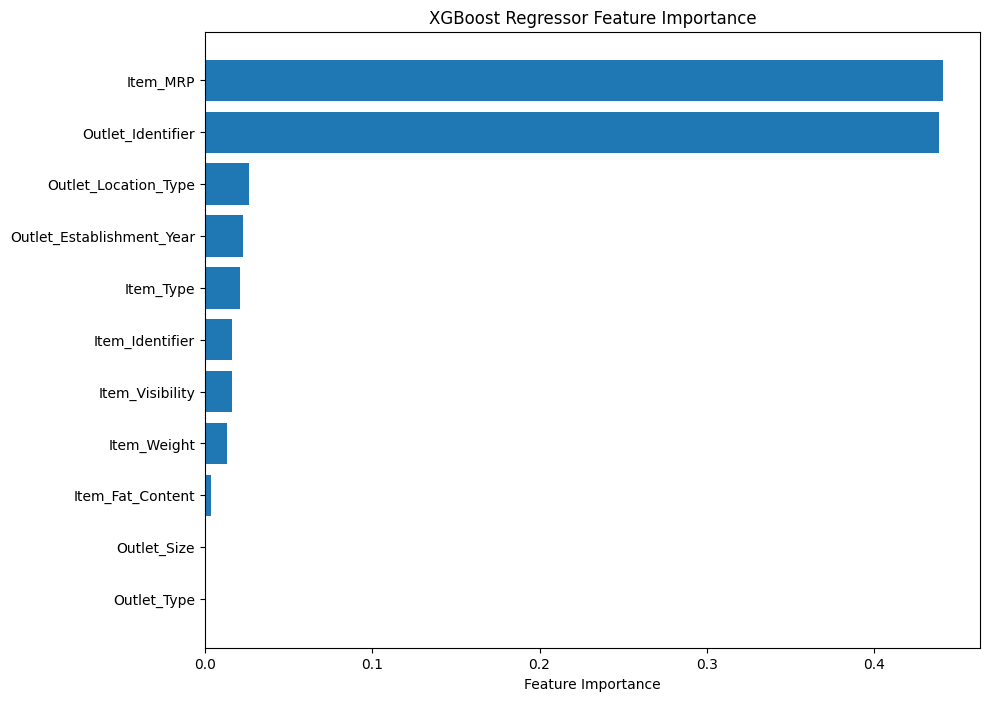

In [136]:
# Get feature importance scores
feature_importance = xgbr_best.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importance scores and feature names
sorted_idx = np.argsort(feature_importance)
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('XGBoost Regressor Feature Importance')
plt.show()


In [ ]:
# Convert the array of predictions to a DataFrame
predictions_df = pd.DataFrame(test_predict, columns=['Item_Outlet_Sales'])

# predictions_df['Item_Outlet_Sales'] = predictions_df['Item_Outlet_Sales'].apply(lambda x: max(x, 0))


# Merge the predictions DataFrame with the "Item_Identifier" and "Outlet_Identifier" columns from the "test_copy"
merged_df = pd.concat([test_copy[['Item_Identifier', 'Outlet_Identifier']], predictions_df], axis=1)

# Save the merged DataFrame to a CSV file
merged_df.to_csv('sales_predict.csv', index=False)

In [138]:
test=pd.read_csv(r"/content/test_Bigmart.csv")

In [139]:
test_copy=test.copy(deep=True)

In [140]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [141]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [142]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode().iloc[0])

In [143]:
# Frequency encoding
nominal_features = ['Item_Type', 'Item_Identifier', 'Outlet_Identifier']
test = frequency_encoding(test, nominal_features)

In [144]:
# Perform ordinal encoding on the three ordinal columns
test[['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',]] = encoder.fit_transform(test[['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']])
print(test)

      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0            0.001232    20.750000          Low Fat         0.007565   
1            0.001056     8.300000              reg         0.038428   
2            0.000704    14.600000          Low Fat         0.099575   
3            0.000528     7.315000          Low Fat         0.015388   
4            0.000704    12.695633          Regular         0.118599   
...               ...          ...              ...              ...   
5676         0.000528    10.500000          Regular         0.013496   
5677         0.000704     7.600000          Regular         0.142991   
5678         0.000352    10.000000          Low Fat         0.073529   
5679         0.000880    15.300000          Regular         0.000000   
5680         0.000704     9.500000          Regular         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0      0.138884  107.8622           0.109136                

In [145]:
test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [146]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})


In [147]:
test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [148]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

In [149]:
test['Item_Fat_Content']


0       0
1       1
2       0
3       0
4       1
       ..
5676    1
5677    1
5678    0
5679    1
5680    1
Name: Item_Fat_Content, Length: 5681, dtype: int64

In [150]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.001232,20.750000,0,0.007565,0.138884,107.8622,0.109136,1999,1.0,0.0,1.0
1,0.001056,8.300000,1,0.038428,0.079916,87.3198,0.108608,2007,1.0,1.0,1.0
2,0.000704,14.600000,0,0.099575,0.019539,241.7538,0.065129,1998,1.0,2.0,0.0
3,0.000528,7.315000,0,0.015388,0.138884,155.0340,0.108608,2007,1.0,1.0,1.0
4,0.000704,12.695633,1,0.118599,0.079916,234.2300,0.109840,1985,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,0.000528,10.500000,1,0.013496,0.138884,141.3154,0.109136,1997,2.0,0.0,1.0
5677,0.000704,7.600000,1,0.142991,0.021299,169.1448,0.108784,2009,1.0,2.0,2.0
5678,0.000352,10.000000,0,0.073529,0.059497,118.7440,0.108960,2002,1.0,1.0,1.0
5679,0.000880,15.300000,1,0.000000,0.076571,214.6218,0.108608,2007,1.0,1.0,1.0


In [153]:
test_scaled=scaler.fit_transform(test)

In [154]:
test_scaled

array([[ 1.93994882,  1.89745979, -0.74081066, ..., -0.28473712,
        -1.369215  , -0.25276858],
       [ 1.23366522, -1.03552991,  1.34987258, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [-0.17890197,  0.44863355, -0.74081066, ..., -0.28473712,
         1.0915602 , -1.50799439],
       ...,
       [-1.59146916, -0.63504136, -0.74081066, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [ 0.52738163,  0.6135406 ,  1.34987258, ..., -0.28473712,
        -0.1388274 , -0.25276858],
       [-0.17890197, -0.75283211,  1.34987258, ..., -0.28473712,
        -0.1388274 , -0.25276858]])

In [155]:
# Make predictions on the test dataset
y_pred_client = xgbr_best.predict(test_scaled)


In [156]:
# Convert the array of predictions to a DataFrame
predictions_df = pd.DataFrame(y_pred_client, columns=['Item_Outlet_Sales'])

# predictions_df['Item_Outlet_Sales'] = predictions_df['Item_Outlet_Sales'].apply(lambda x: max(x, 0))


# Merge the predictions DataFrame with the "Item_Identifier" and "Outlet_Identifier" columns from the "test_copy"
merged_df = pd.concat([test_copy[['Item_Identifier', 'Outlet_Identifier']], predictions_df], axis=1)

# Save the merged DataFrame to a CSV file
merged_df.to_csv('testpredictions.csv', index=False)